In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv(r'../data/heart.csv')

# Preprocess the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8532608695652174
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



DISCUSS THE CHANGE IN ACCURACY DUE TO CHANGES IN THE DATASET


- **Accuracy: 0.8641304347826086**
  - This means that the model correctly classified approximately 86.41% of the instances in the test set.

The KNN model performs well with an overall accuracy of 86.41%. The precision, recall, and F1-scores are also high, indicating that the model is effective at distinguishing between the two classes (heart disease present or not). The metrics suggest that the model is slightly better at predicting class 1 (heart disease present) than class 0.

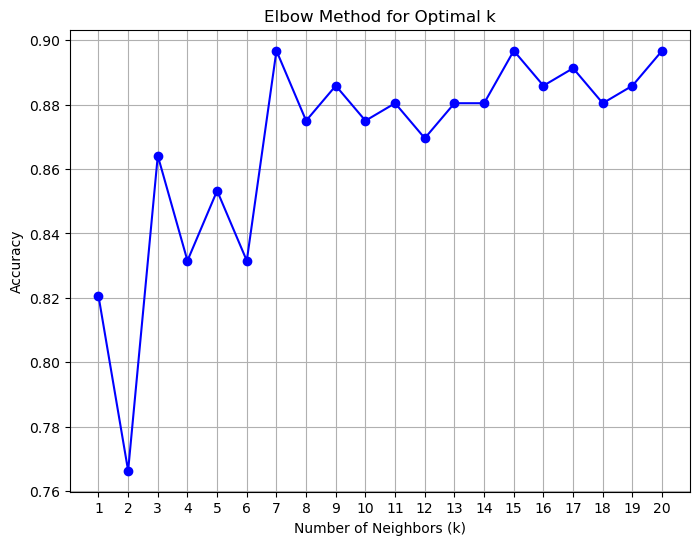

The optimal number of neighbors is: 7


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define a range of k values to test
k_values = range(1, 21)  # Test k values from 1 to 20
accuracies = []

# Iterate through the k values
for k in k_values:
    # Train the KNN model with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the k with the highest accuracy
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"The optimal number of neighbors is: {optimal_k}")


In [8]:
# Preprocess the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8967391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.92      0.91      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



Using the elbow method, the best K value for Euclidian distance metric KNN model was determined to be 7. With k=7 the model accuracy, precision and recall have all improved.

Let's experiment with other distance metrics and use elbow methods to find optimal K value for each of them:

In [9]:



# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a list of distance metrics to experiment with
metrics = ['euclidean', 'manhattan', 'minkowski']

for metric in metrics:
    print(f"Training KNN model with {metric} distance...")

    # Train the KNN classifier with the selected metric
    knn = KNeighborsClassifier(n_neighbors=7, metric=metric)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {metric} distance: {accuracy}")
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('-' * 50)


Training KNN model with euclidean distance...
Accuracy with euclidean distance: 0.8967391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.92      0.91      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184

--------------------------------------------------
Training KNN model with manhattan distance...
Accuracy with manhattan distance: 0.9021739130434783
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        77
           1       0.92      0.91      0.92       107

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

--------------------------------------------------


Finding optimal k for euclidean distance...
Optimal k for euclidean distance: 7
Finding optimal k for manhattan distance...
Optimal k for manhattan distance: 7
Finding optimal k for minkowski distance...
Optimal k for minkowski distance: 7


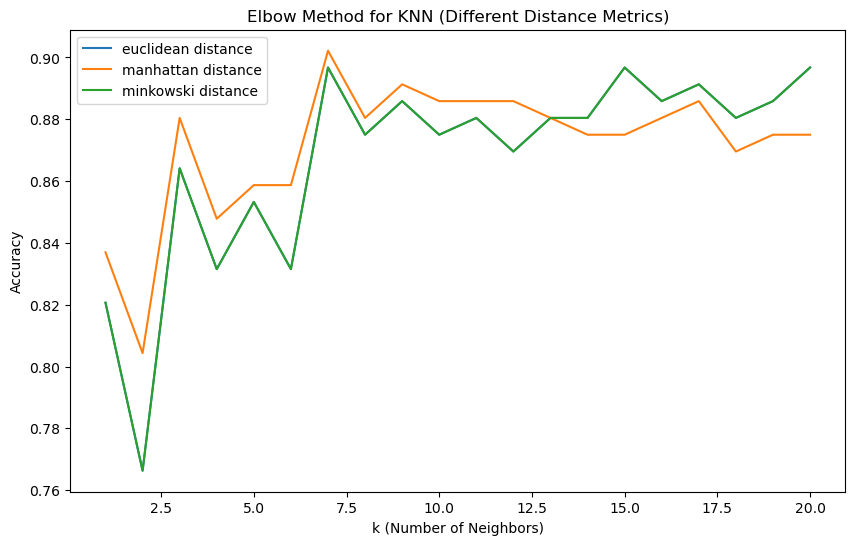

In [13]:


# Preprocess the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the list of distance metrics to experiment with
metrics = ['euclidean', 'manhattan', 'minkowski']

# Create a plot to visualize the elbow method for each distance metric
plt.figure(figsize=(10, 6))

# Loop over each distance metric and apply the elbow method
for metric in metrics:
    print(f"Finding optimal k for {metric} distance...")
    
    # Initialize an empty list to store the accuracy for different k values
    accuracy_list = []
    k_values = range(1, 21)
    
    # Test different values of k (1 to 20)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_test, y_test)
        accuracy_list.append(accuracy)
    
    # Plot accuracy for each k
    plt.plot(k_values, accuracy_list, label=f"{metric} distance")
    
    # Print the optimal k value for the current metric
    optimal_k = k_values[accuracy_list.index(max(accuracy_list))]
    print(f"Optimal k for {metric} distance: {optimal_k}")

# Add plot labels and title
plt.title('Elbow Method for KNN (Different Distance Metrics)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




It appears that the optimal K-value for all 3 distance metrics approaches is 7. The Manhattan distance metric seems to show the best accuracy, outperforming the Euclidian metric we started with initially.

Let's proceed with applying normalization instead of standard scaler to our models:

Finding optimal k for euclidean distance with Normalizer...
Optimal k for euclidean distance with Normalizer: 11
Finding optimal k for manhattan distance with Normalizer...
Optimal k for manhattan distance with Normalizer: 13
Finding optimal k for minkowski distance with Normalizer...
Optimal k for minkowski distance with Normalizer: 11


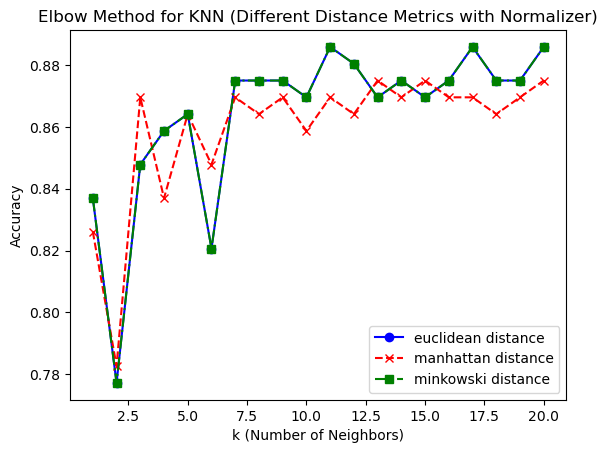

In [14]:
from sklearn.preprocessing import Normalizer

# Create the normalizer
normalizer = Normalizer()

# Loop over each distance metric and apply the elbow method with Normalizer
for metric in metrics:
    print(f"Finding optimal k for {metric} distance with Normalizer...")

    # Initialize an empty list to store the accuracy for different k values
    accuracy_list = []
    k_values = range(1, 21)

    # Test different values of k (1 to 20)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # Apply normalization to the training and testing data
        X_train_norm = normalizer.fit_transform(X_train)
        X_test_norm = normalizer.transform(X_test)
        
        # Train the model
        knn.fit(X_train_norm, y_train)
        accuracy = knn.score(X_test_norm, y_test)
        accuracy_list.append(accuracy)
    
    # Plot accuracy for each k with customized style
    if metric == 'euclidean':
        plt.plot(k_values, accuracy_list, label=f"{metric} distance", color='blue', linestyle='-', marker='o')  # Blue color, solid line, circle markers
    elif metric == 'manhattan':
        plt.plot(k_values, accuracy_list, label=f"{metric} distance", color='red', linestyle='--', marker='x')  # Red color, dashed line, x markers
    else:
        plt.plot(k_values, accuracy_list, label=f"{metric} distance", color='green', linestyle='-.', marker='s')  # Green color, dash-dot line, square markers

    # Print the optimal k value for the current metric
    optimal_k = k_values[accuracy_list.index(max(accuracy_list))]
    print(f"Optimal k for {metric} distance with Normalizer: {optimal_k}")

# Add plot labels and title
plt.title('Elbow Method for KNN (Different Distance Metrics with Normalizer)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import classification_report

# Set the optimal k values as specified
k_values = {
    'euclidean': 11,
    'manhattan': 13,
    'minkowski': 11
}

# Initialize the normalizer
normalizer = Normalizer()

# Loop over each distance metric and run the KNN models
for metric in ['euclidean', 'manhattan', 'minkowski']:
    print(f"Running KNN with {metric} distance metric...")
    
    # Initialize the KNN classifier with the selected k value for the current metric
    knn = KNeighborsClassifier(n_neighbors=k_values[metric], metric=metric)

    # Normalize the training and testing data
    X_train_norm = normalizer.fit_transform(X_train)
    X_test_norm = normalizer.transform(X_test)
    
    # Train the model
    knn.fit(X_train_norm, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_norm)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {metric}: {accuracy:.4f}')
    print(f"Classification Report for {metric}:")
    print(classification_report(y_test, y_pred))
    print("="*50)


Running KNN with euclidean distance metric...
Accuracy for euclidean: 0.8859
Classification Report for euclidean:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

Running KNN with manhattan distance metric...
Accuracy for manhattan: 0.8750
Classification Report for manhattan:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

Running KNN with minkowski distance metric...
Accuracy for minkowski: 0.8859
Classification Report for minkowski:
    

The StandardScaler is showing better F1 score than normalization technique. So far we should stick with StandardScaler model and Manhattan distance metric, k=7.

Let's try few other techniques to improve the model performance. Since our dataset is imbalanced, we can explore techniques like:
* Oversampling (e.g., SMOTE)
* Undersampling
* Class weights in evaluation.


We should also implement Grid Search for Tuning hyperparameters as a final optimization technique.